In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import fftpack

In [20]:
BW = 80e6
Bi = 8e6
fs = 17e6
Tp = 0.025
delfn = BW / Bi

In [21]:
def chirp(f0, f1, fs, delT):
    t = np.linspace(0, delT, num = int(fs*delT))
    return scipy.signal.chirp(t, f0, delT, f1)

In [22]:
w_ref = chirp(0, 8e6, 16e6, 0.5)
w_rx = np.roll(w_ref, 500000) + 0.2*np.random.normal(0,1,len(w_ref))

In [23]:
N = len(w_ref)
L = fs * Tp
Lup = 2 * L

In [24]:
def matched_filter(ref, rx):
    N = len(rx)
    rx_fft = scipy.fft.fft(rx)/N
    ref_fft = np.conjugate(scipy.fft.fft(ref)/N)
    mix = rx_fft * ref_fft
    matched = scipy.fft.ifftshift(scipy.fft.ifft(mix))
    return matched/matched.max()

In [25]:
w_ref = chirp(0, 8e6, 16e6, 0.5)
w_rx = np.roll(w_rx, 500000) + 0.2*np.random.normal(0,1,len(w_ref))
output = matched_filter(w_rx, np.roll(w_rx, 500000))

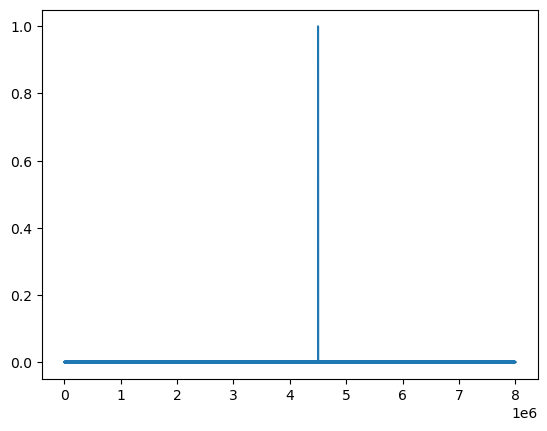

In [26]:
plt.plot(np.arange(len(output)), output)

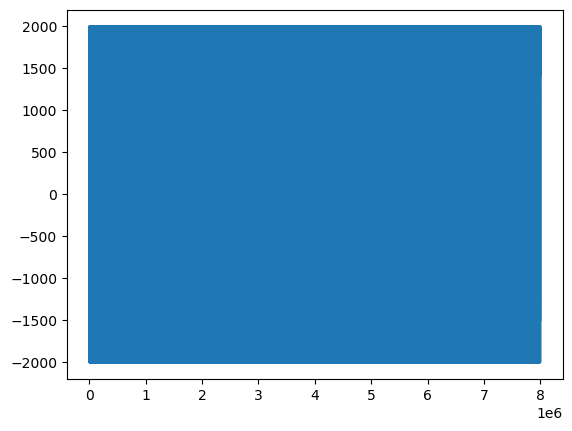

In [9]:
w_ref = chirp(0, 8e6, 16e6, 0.5)
plt.plot(scipy.fft.fft(w_ref))
plt.show()

In [10]:
Bi = 8e6
fs = 17e6
Tp = 1
K = Bi / Tp
t = np.arange(0, Tp, 1/fs)
#send_chirp = np.array(np.exp(1j*np.pi*K*t**2), dtype = np.complex64)
send_chirp = np.exp(1j * np.pi * K * t**2).astype(np.complex128)

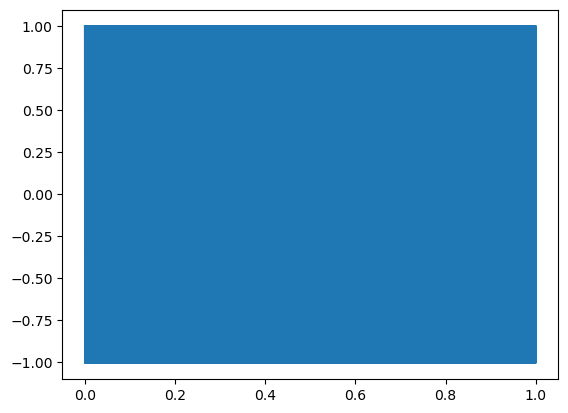

In [11]:
plt.plot(t, send_chirp)

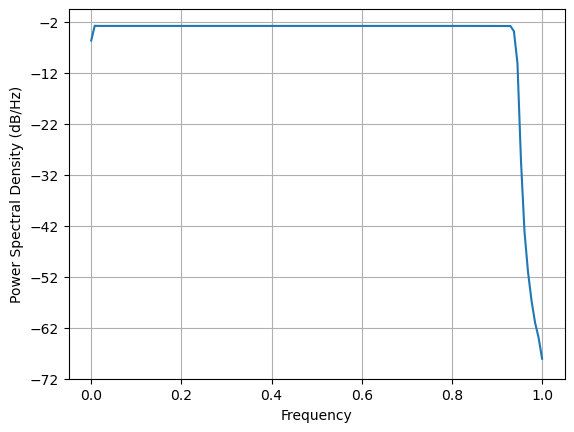

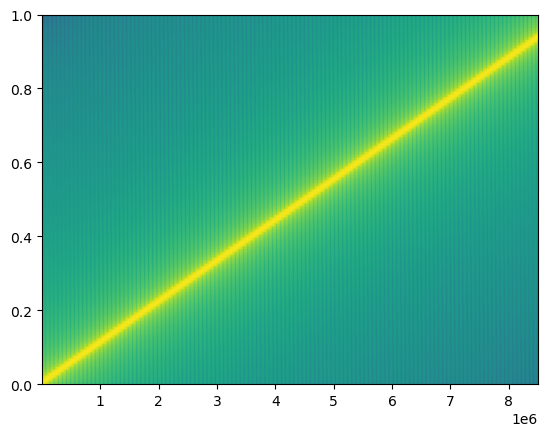

In [13]:
plt.psd(send_chirp.real)
plt.show()
plt.specgram(send_chirp.real)
plt.show()

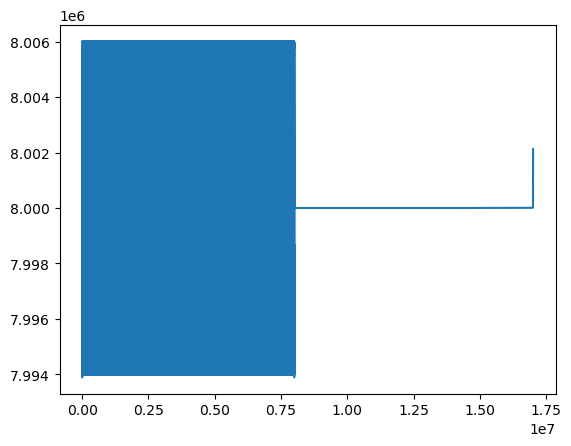